<a href="https://colab.research.google.com/github/amirjhn/MachineLearning2025/blob/main/mini_projects/mini_project_2/mini_project2_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [ ]:
#https://drive.google.com/file/d/1OKMqLEUFQvMnjDJ1tfr4oXfXk2uIKk2O/view?usp=sharing
!gdown 1OKMqLEUFQvMnjDJ1tfr4oXfXk2uIKk2O

Downloading...
From: https://drive.google.com/uc?id=1OKMqLEUFQvMnjDJ1tfr4oXfXk2uIKk2O
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 33.1MB/s]


In [ ]:
# part 1
datasets = pd.read_csv('/content/Perceptron.csv')
datasets

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0
...,...,...,...
395,0.574634,0.782211,-1.0
396,-1.413307,-0.673049,1.0
397,-0.465114,-1.290830,1.0
398,1.522055,0.948007,-1.0


In [ ]:
X = datasets[['x1','x2']]
y = datasets['y']
print(X,y)

           x1        x2
0    1.028503  0.973218
1    0.252505  0.955872
2    1.508085  0.672058
3    1.940002  1.721370
4   -1.048819 -0.844999
..        ...       ...
395  0.574634  0.782211
396 -1.413307 -0.673049
397 -0.465114 -1.290830
398  1.522055  0.948007
399  0.834118  0.926710

[400 rows x 2 columns] 0     -1.0
1     -1.0
2     -1.0
3     -1.0
4      1.0
      ... 
395   -1.0
396    1.0
397    1.0
398   -1.0
399   -1.0
Name: y, Length: 400, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

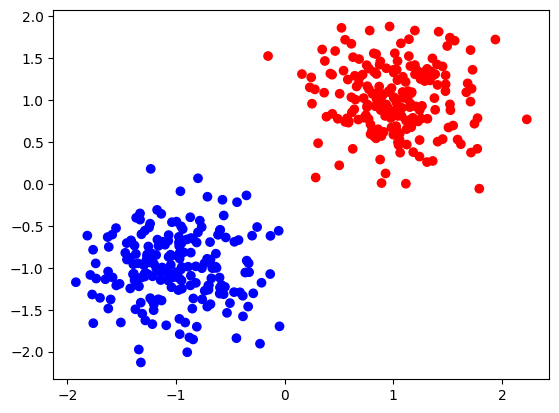

In [ ]:
colors = ['blue' if label == 1 else 'red' for label in y]
a = datasets['x1']
b = datasets['x2']
plt.scatter(a, b, c=colors)
plt.show

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 93)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [ ]:
perceptron_model = Perceptron()
# treshold = 0
perceptron_model.fit(X_train, y_train)

Perceptron()

In [ ]:
# part 2
test_accuracy = perceptron_model.score(X_test, y_test)
test_accuracy

1.0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


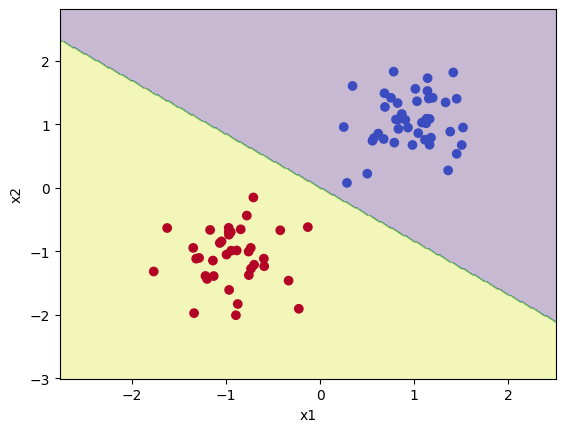

In [ ]:
X_test_array = X_test.values
x_min, x_max = X_test_array[:, 0].min() - 1, X_test_array[:, 0].max() + 1
y_min, y_max = X_test_array[:, 1].min() - 1, X_test_array[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = perceptron_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
# part 3
perceptron_model_new = Perceptron(random_state=42, tol=0.001, max_iter=1000, eta0=0.1, verbose=0, n_jobs=-1)
perceptron_model_new.fit(X_train, y_train)

Perceptron(eta0=0.1, n_jobs=-1, random_state=42)

In [ ]:
test_accuracy_1 = perceptron_model_new.score(X_test, y_test)
test_accuracy_1

1.0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


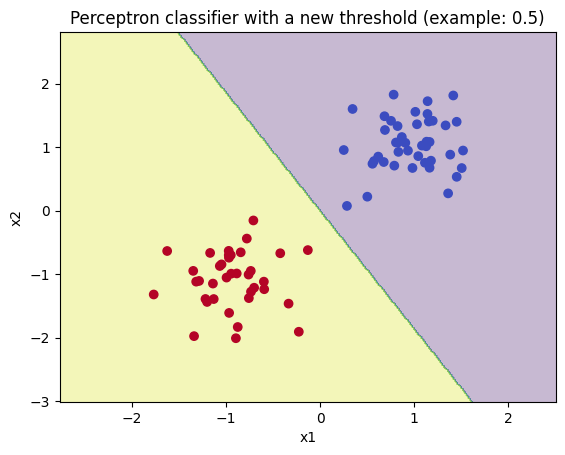

In [ ]:
Z = perceptron_model_new.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron classifier with a new threshold (example: 0.5)')
plt.show()

In [ ]:
perceptron_model_without_bias = Perceptron(fit_intercept=False, random_state=42, tol=0.001, max_iter=1000, eta0=0.1, verbose=0, n_jobs=-1)
perceptron_model_without_bias.fit(X_train, y_train)

Perceptron(eta0=0.1, fit_intercept=False, n_jobs=-1, random_state=42)

In [ ]:
test_accuracy_2 = perceptron_model_without_bias.score(X_test, y_test)
test_accuracy_2

1.0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


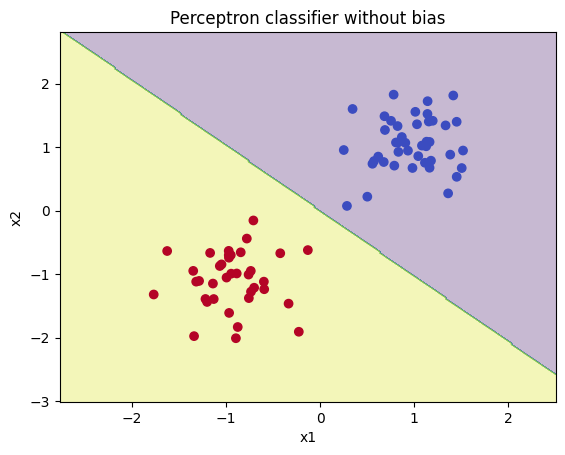

In [ ]:
Z = perceptron_model_without_bias.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron classifier without bias')
plt.show()